#Instagram Celebrity Engagement Analysis


##Reading and Basic Data-Cleaning

In [1]:
df<-read.csv("/content/instagram_global_top_1000.csv")

head(df)

,Country,Rank,Account,Title,Link,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg,Scraped
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,2022-02-07 16:50:24.798803
2,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,2022-02-07 16:50:24.798803
3,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,2022-02-07 16:50:24.798803
4,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000,2022-02-07 16:50:24.798803
5,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,2022-02-07 16:50:24.798803
6,All,6,zendaya,Zendaya,https://www.instagram.com/zendaya/,Cinema|Actors/actresses|Fashion,127800000,United States,5800000,7800000,2022-02-07 16:50:24.798803


### Summary of the Dataset

In [2]:
summary (df)

   Country               Rank          Account             Title          
 Length:1000        Min.   :   1.0   Length:1000        Length:1000       
 Class :character   1st Qu.: 250.8   Class :character   Class :character  
 Mode  :character   Median : 500.5   Mode  :character   Mode  :character  
                    Mean   : 500.5                                        
                    3rd Qu.: 750.2                                        
                    Max.   :1000.0                                        
     Link             Category           Followers         Audience.Country  
 Length:1000        Length:1000        Min.   :  2800000   Length:1000       
 Class :character   Class :character   1st Qu.:  9000000   Class :character  
 Mode  :character   Mode  :character   Median : 14400000   Mode  :character  
                                       Mean   : 24836100                     
                                       3rd Qu.: 25650000                     
       

As we can observe there are no null values here and we have 3 ratio columns and rest are categorical.

### Since we are not concerned with when the data was scraped, drop the Scraped column

In [3]:
df <- subset (df, select=-c(Scraped))
head(df)

,Country,Rank,Account,Title,Link,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000
2,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000
3,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000
4,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000
5,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000
6,All,6,zendaya,Zendaya,https://www.instagram.com/zendaya/,Cinema|Actors/actresses|Fashion,127800000,United States,5800000,7800000


### Since there is no virtual utility for link column, drop it.

In [4]:
df <- subset (df, select=-c(Link))
head(df)

,Country,Rank,Account,Title,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,All,1,cristiano,Cristiano Ronaldo,Sports with a ball,400100000,India,7800000,9500000
2,All,2,kyliejenner,Kylie 🤍,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000
3,All,3,leomessi,Leo Messi,Sports with a ball|Family,306300000,Argentina,4800000,6500000
4,All,4,kendalljenner,Kendall,Modeling|Fashion,217800000,United States,3400000,5400000
5,All,5,selenagomez,Selena Gomez,Music|Lifestyle,295800000,United States,2700000,3600000
6,All,6,zendaya,Zendaya,Cinema|Actors/actresses|Fashion,127800000,United States,5800000,7800000


### Inspect Country column.

#### Find number of distinct values in the country column.

In [5]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
n_distinct(df$Country)

[1] 1

#### Since there are no unique values in the Country Coulmn, it serves no virtual utility. So Drop it. 

In [7]:
df<-subset(df, select=-c(Country))
head(df)

,Rank,Account,Title,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,1,cristiano,Cristiano Ronaldo,Sports with a ball,400100000,India,7800000,9500000
2,2,kyliejenner,Kylie 🤍,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000
3,3,leomessi,Leo Messi,Sports with a ball|Family,306300000,Argentina,4800000,6500000
4,4,kendalljenner,Kendall,Modeling|Fashion,217800000,United States,3400000,5400000
5,5,selenagomez,Selena Gomez,Music|Lifestyle,295800000,United States,2700000,3600000
6,6,zendaya,Zendaya,Cinema|Actors/actresses|Fashion,127800000,United States,5800000,7800000


### Inspect Audience.Country Column

#### Check for null/unfilled values

In [8]:
length(df$Audience.Country[df$Audience.Country == ""])

[1] 7

#### Replace unfilled values with "unknown"

In [9]:
require(tidyverse)

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [10]:
df$Audience.Country[df$Audience.Country == ""] <- "others"

head(filter(df, Audience.Country == "others"))

,Rank,Account,Title,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,21,thv,V,,34100000,others,10400000,10400000
2,27,agustd,SUGA of BTS 민윤기,,27900000,others,10600000,10600000
3,32,rkive,RM,,28000000,others,8900000,8900000
4,476,aboflah,AboFlah,Humor|Fun|Happiness,7200000,others,0,946800
5,728,joshu_acoustic,Joshua Hong,Music,3800000,others,0,969200
6,771,lomon991111,Lomon 991111,,3500000,others,0,987300


###Inspect and manipulate Category column

In [11]:
head (df$Category)

[1] "Sports with a ball"              "Fashion|Modeling|Beauty"        
[3] "Sports with a ball|Family"       "Modeling|Fashion"               
[5] "Music|Lifestyle"                 "Cinema|Actors/actresses|Fashion"

#### Check for unfilled Category

In [12]:
length(df$Category[df$Category == ""])

[1] 91

Replace unfilled values with "others"

In [13]:
df$Category[df$Category == ""] <- "others"

#head(which(df, df$Category == "others"))

#### Split the Category on the basis of |

In [14]:
# df$Category <- strsplit(df$Category, "\\|")
# head (df)

## Exploratory Data Analysis.

### Exploring Audience.Country Column.

#### Number of distinct Countries in the Audience.Country

In [15]:
n_distinct (df$Audience.Country)

[1] 32

#### Frequency dataframe for Audience.Country

In [16]:
require(tibble)

In [17]:
freq_country<- data.frame(enframe(apply(data.frame(df$Audience.Country), 2, table), name="Countries", value="Frequency"))
freq_country <- freq_country[order(freq_country$Frequency, decreasing = TRUE), ]
freq_country

,Countries,Frequency
,<chr>,"<int[,1]>"
32,United States,283
3,Brazil,161
10,India,143
11,Indonesia,130
17,Mexico,50
26,Spain,34
23,Russia,30
2,Argentina,24
12,Iran,17


From the above table it's evident that United States contribute the major porton of audience for most of the celebrities. 

#### Create Frequency Bar-Plot for the Audience.Countries

#####Bar-plot for top 8 countries with highest audience contributions for celebrities. 

In [18]:
require(ggplot2)

In [19]:
data<-top_n (freq_country, 8, Frequency)

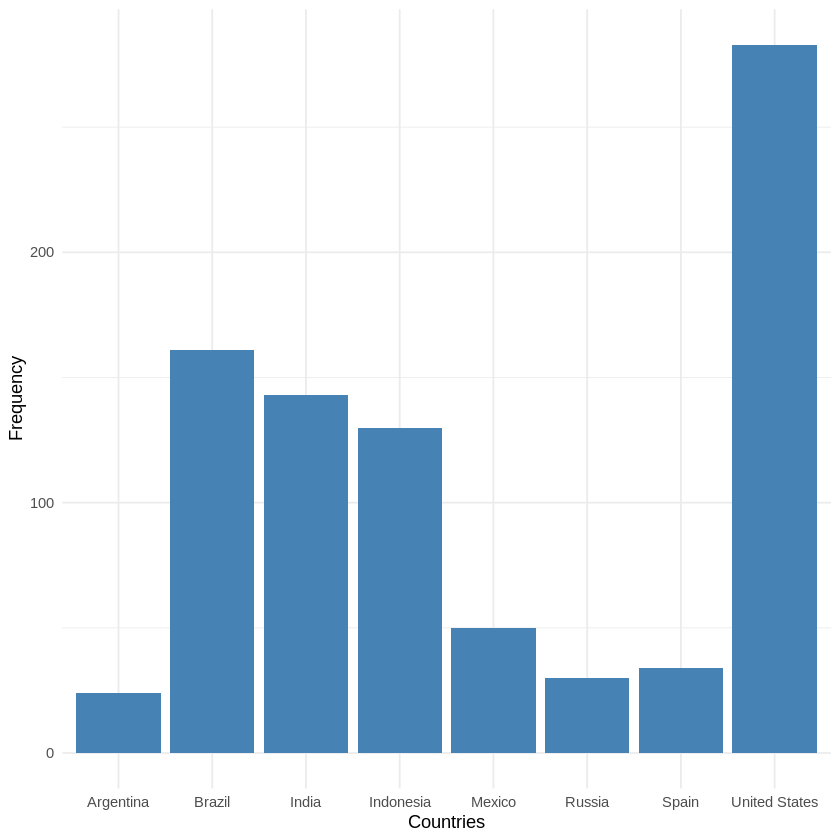

In [20]:
ggplot(data=data, aes(x=Countries, y=Frequency)) +
  geom_bar(stat="identity", fill="steelblue")+
  theme_minimal()

From the plot we infer that USA is largest contributer for popularity of the most celebrities on instagram. 

##### Bar plot for top 8 countries with lowest audience contributions for celebrities

In [21]:
data<-top_n (freq_country, -8, Frequency)

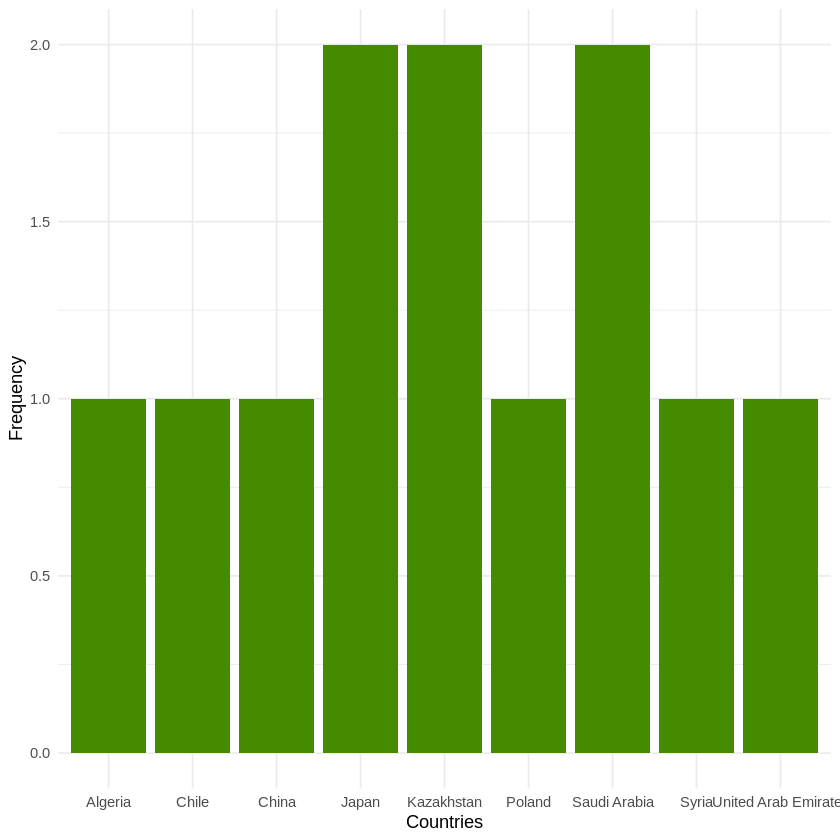

In [22]:
ggplot(data=data, aes(x=Countries, y=Frequency)) +
  geom_bar(stat="identity", fill="chartreuse4")+
  theme_minimal()

##### Celebrities with most influence in least influenced countries.

In [23]:
least_freq_countries <- c(filter(freq_country, Frequency == 1)$Countries)

data <- filter (df, Audience.Country == least_freq_countries)

data

Warning message in Audience.Country == least_freq_countries:
“longer object length is not a multiple of shorter object length”


Rank,Account,Title,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
450,faz3,Fazza,Lifestyle,13700000,United Arab Emirates,396200,523300
695,narins_beauty,••Narins Beauty••,Lifestyle,8200000,Syria,392100,478100


#### Create Parliament Plot for Audience.Countries

In [24]:
install.packages("ggparliament")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
library(ggparliament)


In [26]:
circle <- parliament_data(election_data = freq_country,
                             type = "circle",
                             parl_rows = 10,
                             party_seats = freq_country$Frequency)

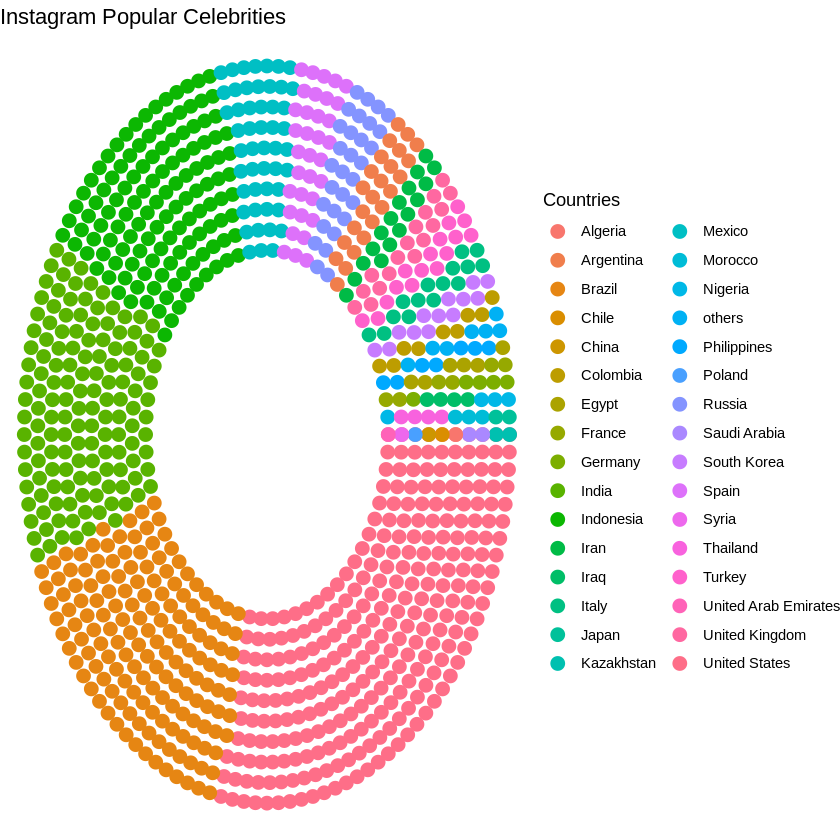

In [27]:
ggplot(circle, aes(x = x, y = y, colour = Countries)) +
  geom_parliament_seats() + 
  theme_ggparliament() +
  labs(title = "Instagram Popular Celebrities") +
  scale_fill_hue(c=45, l=120)

#### Group Engagement Score VS Number of Followers based on Audience.Countries

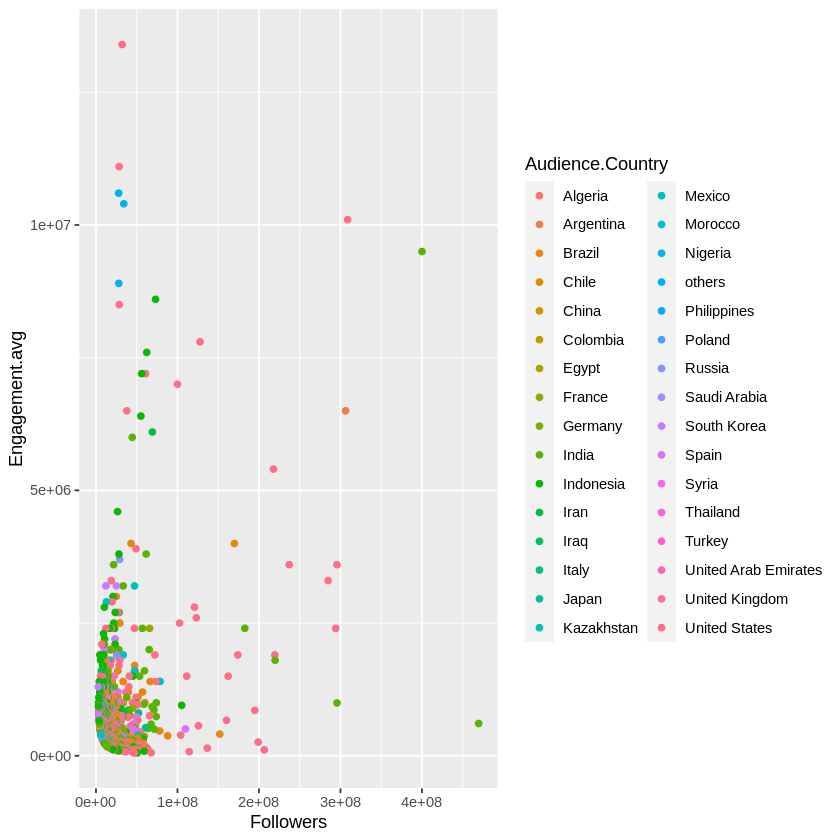

In [28]:
ggplot (df, aes(Followers, Engagement.avg)) + geom_point (aes(col=Audience.Country))

### Exploring Category Column

#### Distinct Number of Categories

In [29]:
n_distinct(df$Category)

[1] 166

#### Frequency Dataframe for Category

In [30]:
freq_category <- data.frame(enframe(apply(data.frame(df$Category), 2, table), name="Category", value="Frequency"))
freq_category <- freq_category[order(freq_category$Frequency, decreasing = TRUE), ]
head(freq_category)

,Category,Frequency
,<chr>,"<int[,1]>"
117,Music,170
27,Cinema|Actors/actresses,165
161,Sports with a ball,103
139,others,91
82,Lifestyle,58
107,Modeling,20


#### Frequency Bar plot for Category Column

##### Bar plot for top 5 most popular categories

In [31]:
data<-top_n (freq_category, 5, Frequency)
head (data)

,Category,Frequency
,<chr>,"<int[,1]>"
1,Music,170
2,Cinema|Actors/actresses,165
3,Sports with a ball,103
4,others,91
5,Lifestyle,58


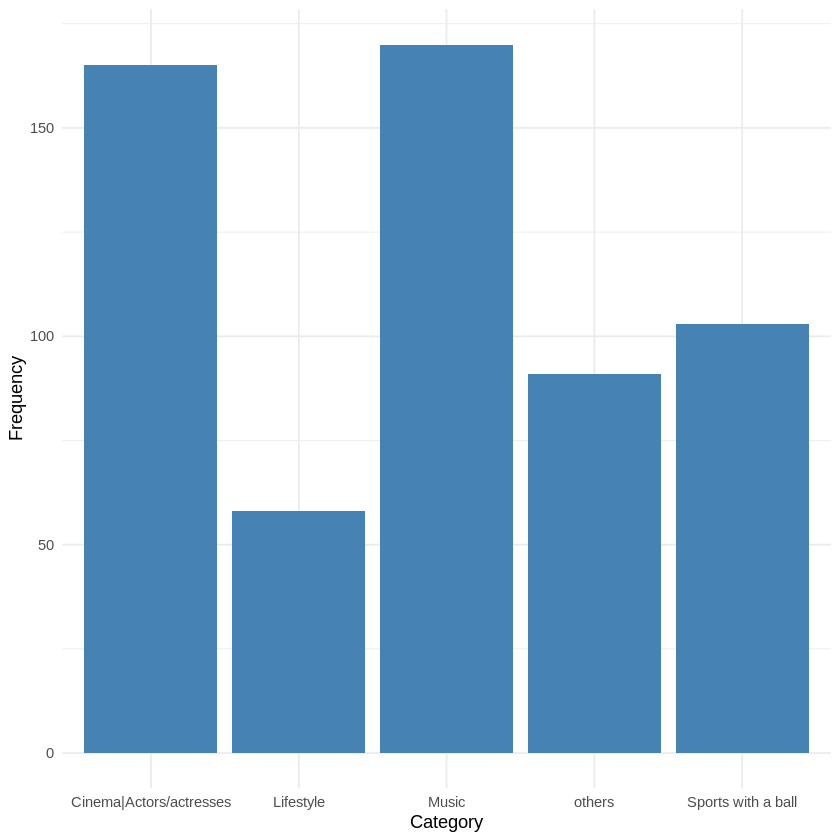

In [32]:
ggplot(data=data, aes(x=Category, y=Frequency)) +
  geom_bar(stat="identity", fill="steelblue")+
  theme_minimal()

##### Bar plot for bottom 5 most popular category

In [33]:
data<-top_n (freq_category, -5, Frequency)
head (data)

,Category,Frequency
,<chr>,"<int[,1]>"
1,Accessories|Jewellery|Clothing|Outfits|Fashion,1
2,Animals,1
3,Art|Artists|Beauty,1
4,Art|Artists|Cinema|Actors/actresses|Shows,1
5,Art|Artists|Comics sketches,1
6,Art|Artists|Fashion|Music,1


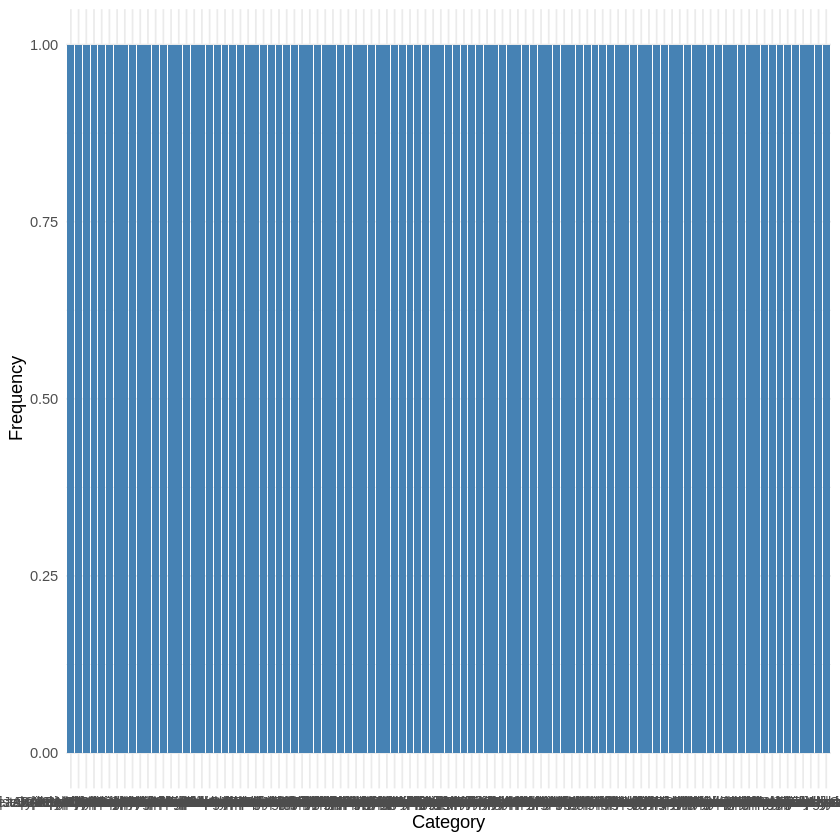

In [34]:
ggplot(data=data, aes(x=Category, y=Frequency)) +
  geom_bar(stat="identity", fill="steelblue")+
  theme_minimal()

#### Create Parliament Plot for Category

In [35]:
circle <- parliament_data(election_data = freq_category,
                             type = "circle",
                             parl_rows = 10,
                             party_seats = freq_category$Frequency)

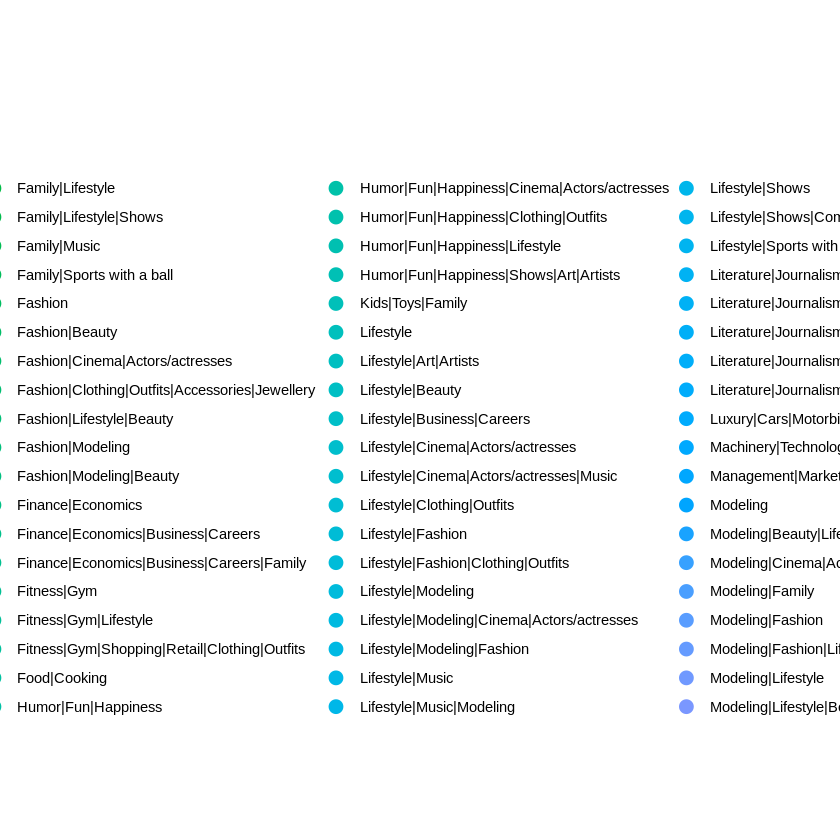

In [36]:
ggplot(circle, aes(x = x, y = y, colour = Category)) +
  geom_parliament_seats() + 
  theme_ggparliament() +
  labs(title = "Instagram Popular Accounts") +
  scale_fill_hue(c=45, l=120)

#### Group Engagement Score VS Number of Followers based on Category

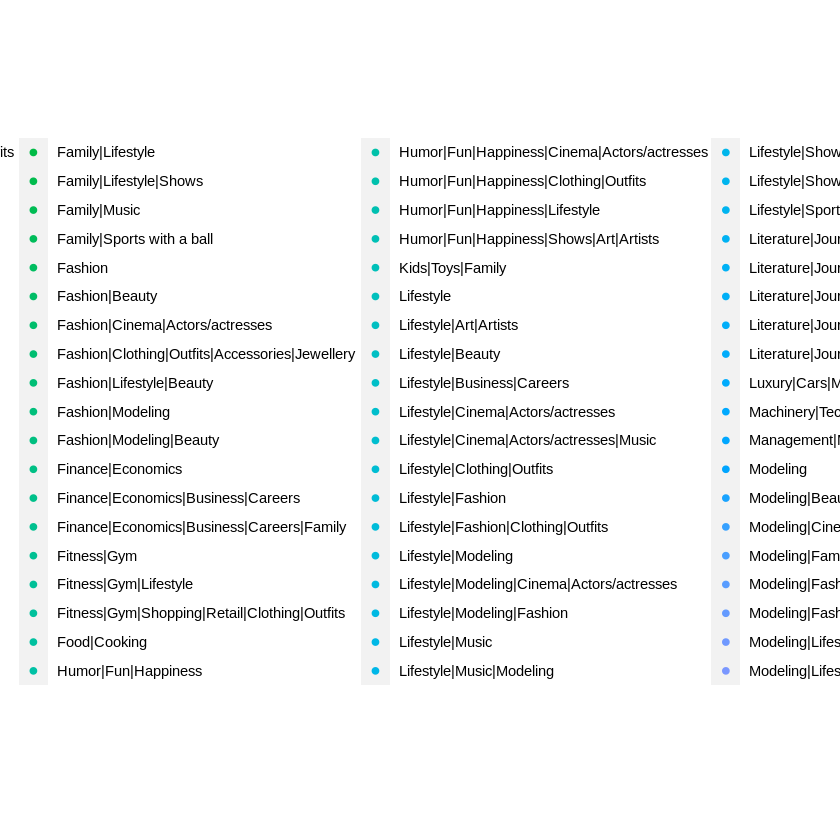

In [37]:
ggplot (df, aes(Followers, Engagement.avg)) + geom_point (aes(col=Category))

### Exploring Followers Column

#### Bar Plot for Top 5 Instagram accounts with most followers.

In [38]:
top_5_followers <- top_n (df, 5, Followers)

top_5_followers

Rank,Account,Title,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,cristiano,Cristiano Ronaldo,Sports with a ball,400100000,India,7800000,9500000
2,kyliejenner,Kylie 🤍,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000
3,leomessi,Leo Messi,Sports with a ball|Family,306300000,Argentina,4800000,6500000
5,selenagomez,Selena Gomez,Music|Lifestyle,295800000,United States,2700000,3600000
28,therock,therock,Cinema|Actors/actresses|Fitness|Gym,295800000,India,741000,994800
29,instagram,Instagram,Photography,469600000,India,490400,608100


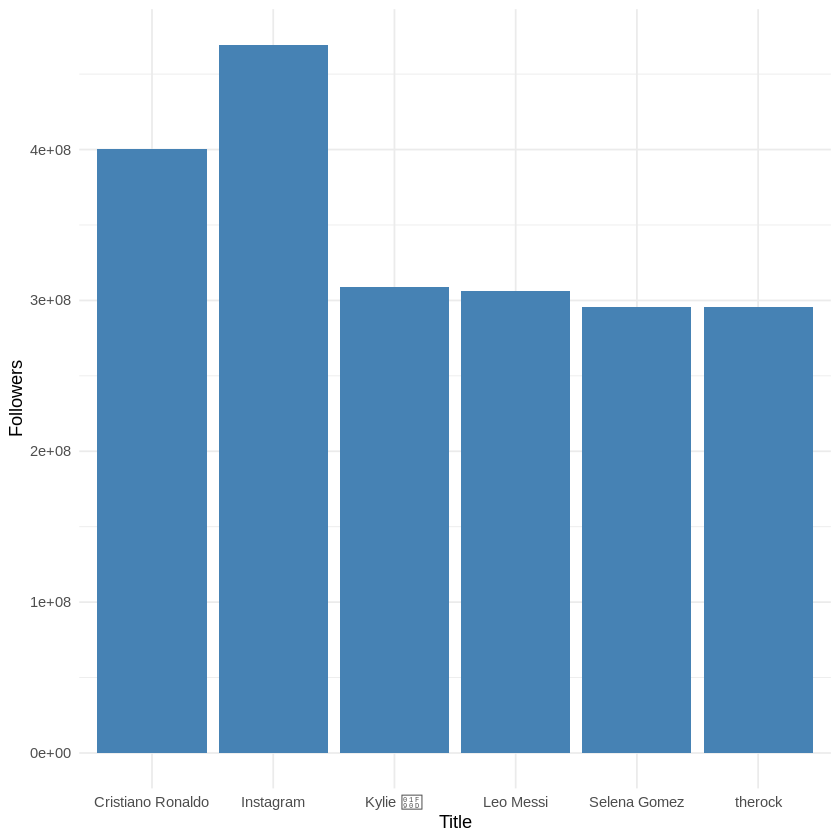

In [39]:
ggplot(top_5_followers, aes (x = Title, y = Followers)) +   geom_bar(stat="identity", fill="steelblue")+
  theme_minimal()

#### Bar Plot for Top 5 Instagram accounts with least followers.

In [40]:
least_5_followers <- top_n (df, -5, Followers)

least_5_followers

Rank,Account,Title,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
748,yooncy1,윤찬영 Yoon chanyoung,others,2800000,South Korea,1100000,1300000
809,for_everyoung10,장원영 WONYOUNG,others,3100000,Indonesia,801100,1000000
836,wilbursoot,Wilbur Soot,Music,3200000,United States,733800,942600
837,sound_of_coups,COUPS,others,3200000,Indonesia,727300,932900
972,nozeworld,no:ze | 노제,others,3200000,South Korea,637000,779700


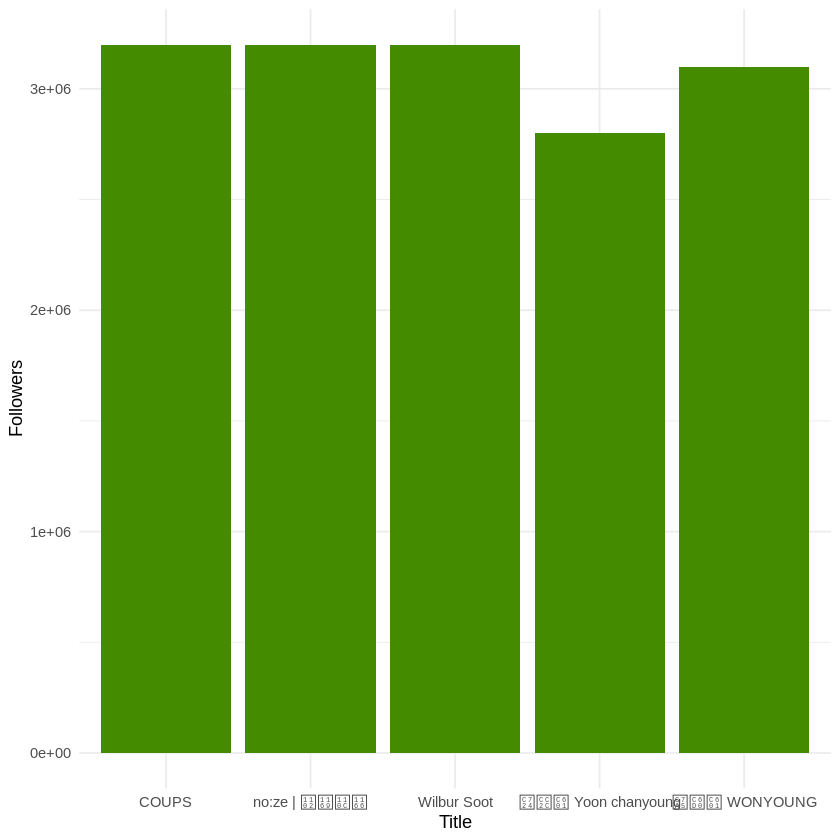

In [41]:
ggplot(least_5_followers, aes (x = Title, y = Followers)) +   geom_bar(stat="identity", fill="chartreuse4")+
  theme_minimal()

#### Plot Number of Followers against Authentic.Engagement

`geom_smooth()` using formula = 'y ~ x'


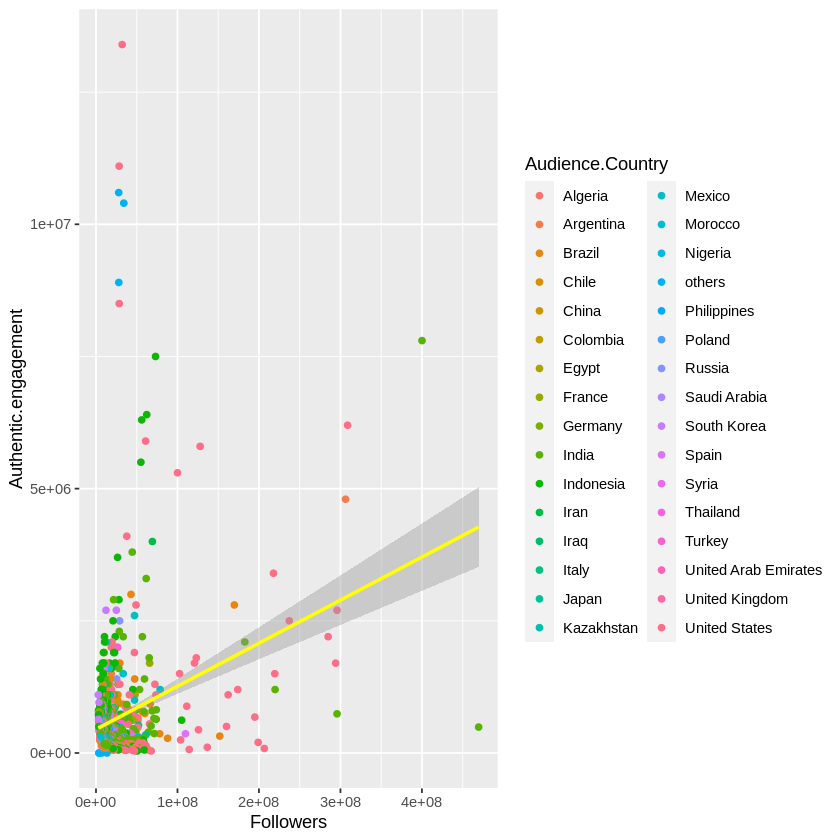

In [42]:
ggplot (df, aes(Followers, Authentic.engagement)) + geom_point (aes(col=Audience.Country)) + geom_smooth(method=lm, se=TRUE, color="yellow")

#### Box Plot for measuring the outliers. 

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


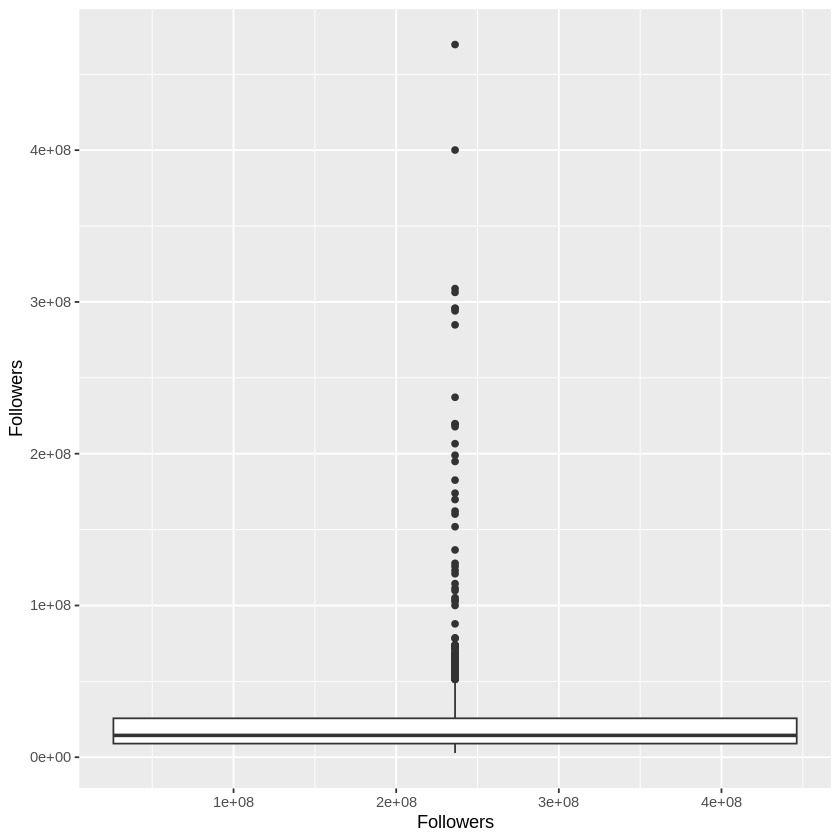

In [43]:
ggplot (df, aes(Followers)) + geom_boxplot(aes(y=Followers))

#### Density Plot

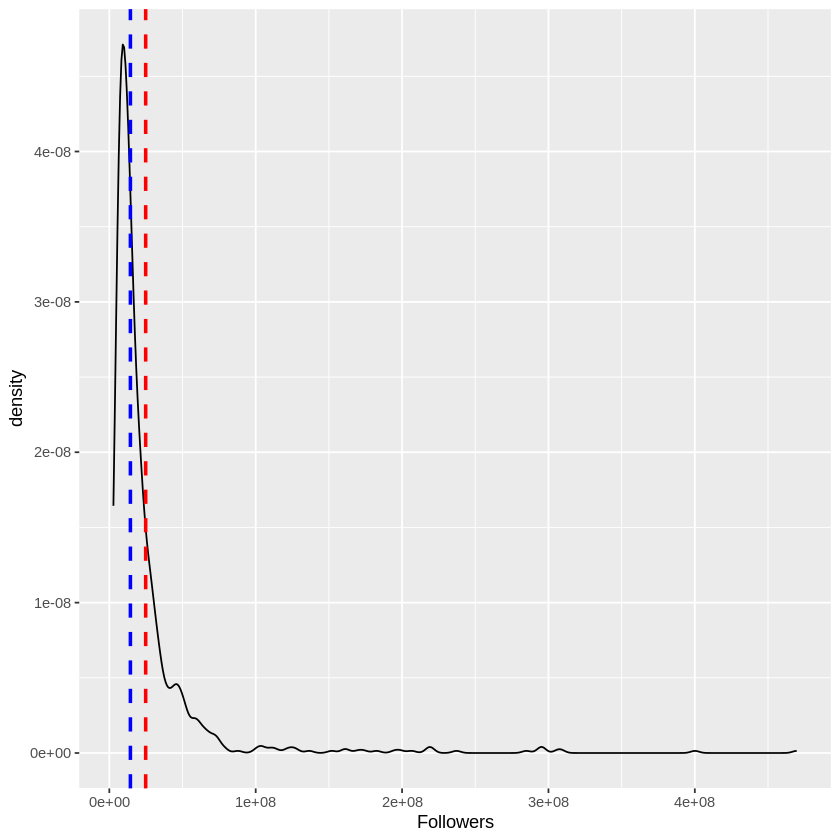

In [44]:
density_followers <- ggplot(df, aes(x=Followers)) + geom_density ()
density_followers + geom_vline(aes(xintercept=mean(Followers)), color="red", linetype="dashed", linewidth=1) + geom_vline(aes(xintercept=median(Followers)), color="blue", linetype="dashed", linewidth=1)

The Followers is left skewed. 

### Exploring Engagement Column

#### Bar Plot for Top 5 Instagram accounts with most engagement.

In [45]:
top_5_engagement <- top_n (df, 5, Authentic.engagement)

top_5_engagement

Rank,Account,Title,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
16,abcdefghi__lmnopqrstuvwxyz,Jungkook,others,32100000,United States,13400000,13400000
21,thv,V,others,34100000,others,10400000,10400000
26,jin,Jin of BTS,others,28400000,United States,11100000,11100000
27,agustd,SUGA of BTS 민윤기,others,27900000,others,10600000,10600000
32,rkive,RM,others,28000000,others,8900000,8900000


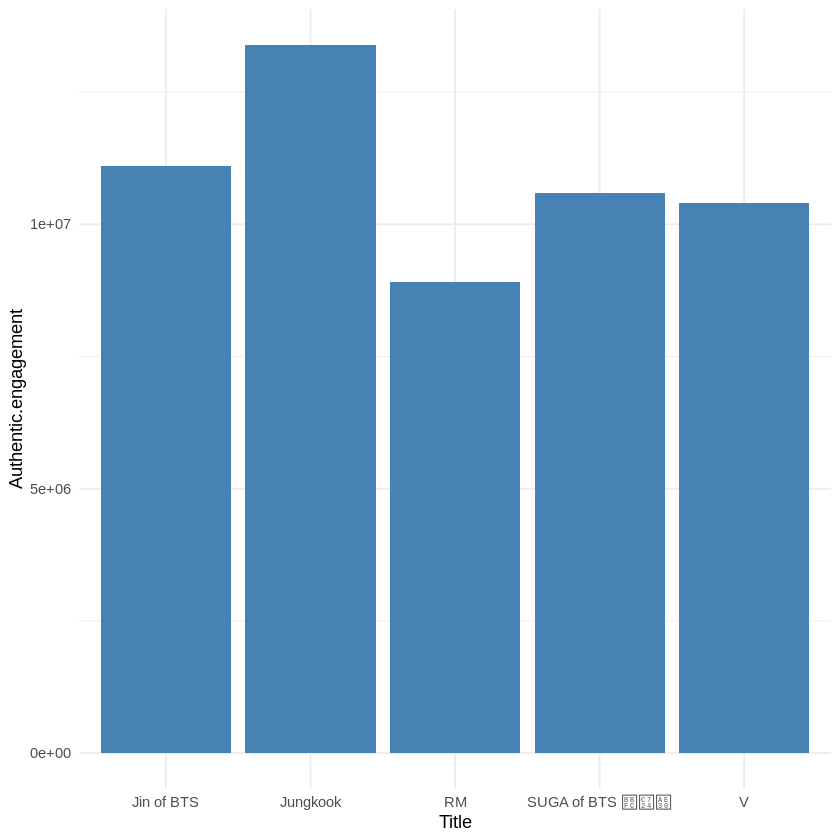

In [46]:
ggplot(top_5_engagement, aes (x = Title, y = Authentic.engagement	)) +   geom_bar(stat="identity", fill="steelblue")+
  theme_minimal()

#### Bar Plot for accounts with least engagement

In [47]:
least_5_engagement  <- top_n (df, -5, Authentic.engagement)
least_5_engagement

Rank,Account,Title,Category,Followers,Audience.Country,Authentic.engagement,Engagement.avg
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
476,aboflah,AboFlah,Humor|Fun|Happiness,7200000,others,0,946800
692,snoopdogg,snoopdogg,Lifestyle|Music,67700000,United States,38300,57600
728,joshu_acoustic,Joshua Hong,Music,3800000,others,0,969200
771,lomon991111,Lomon 991111,others,3500000,others,0,987300
938,dukeandduchessofcambridge,Duke and Duchess of Cambridge,Family|Finance|Economics,13500000,others,0,191800


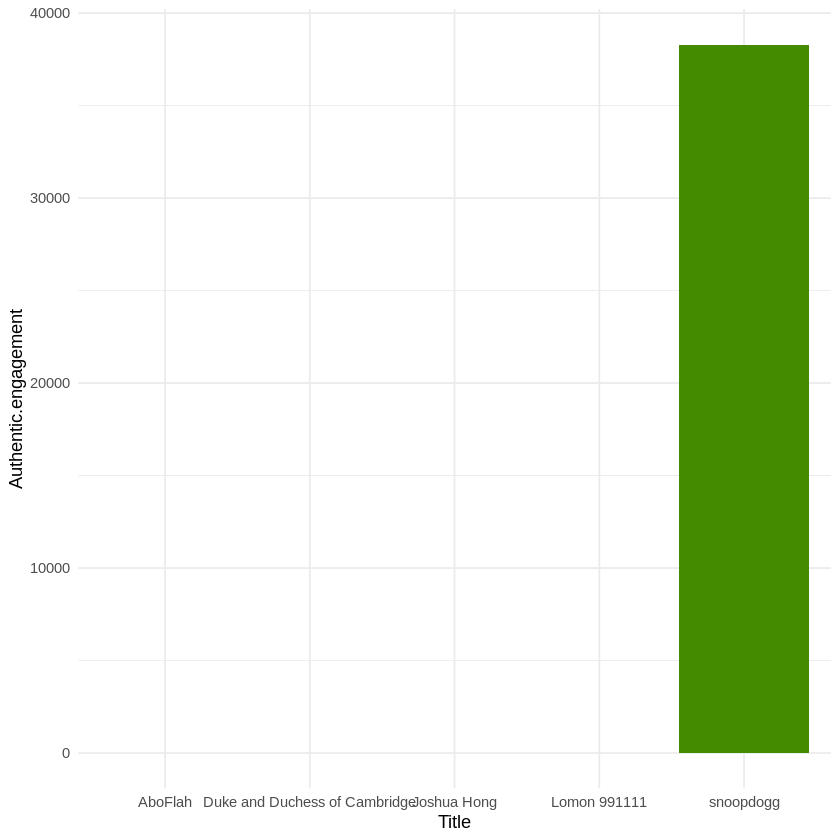

In [48]:
ggplot(least_5_engagement, aes (x = Title, y = Authentic.engagement)) +   geom_bar(stat="identity", fill="chartreuse4")+
  theme_minimal()

#### Box Plot for measuring the outliers. 

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


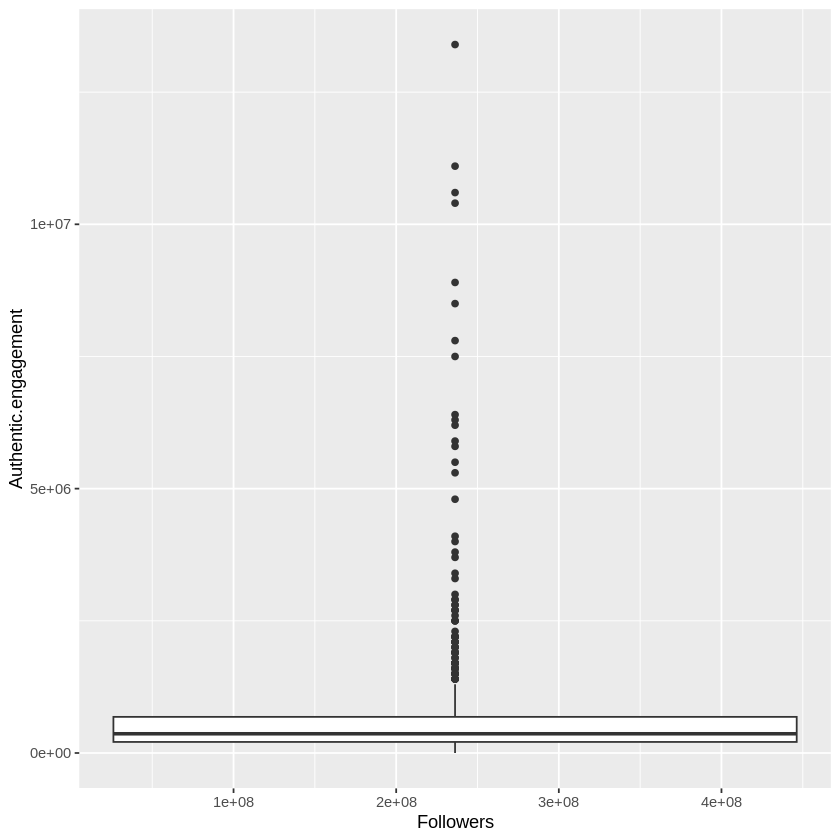

In [49]:
ggplot (df, aes(Followers)) + geom_boxplot(aes(y=Authentic.engagement))

#### Density Plot

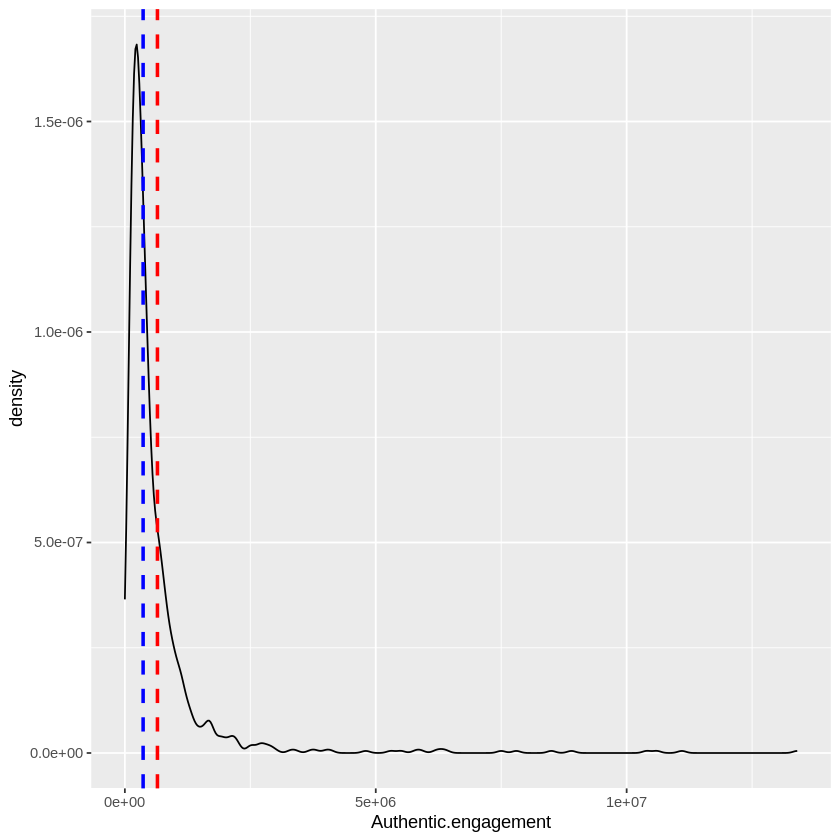

In [50]:
density_engagement <- ggplot(df, aes(x=Authentic.engagement)) + geom_density ()
density_engagement + geom_vline(aes(xintercept=mean(Authentic.engagement)), color="red", linetype="dashed", linewidth=1) + geom_vline(aes(xintercept=median(Authentic.engagement)), color="blue", linetype="dashed", linewidth=1)

Alike Followers even Engagement is left skewed.

### Hypothesis Testing

####Corelation Testing

##### Testing Engagement with Followers

In [51]:
cor.test(df$Followers, df$Authentic.engagement)


	Pearson's product-moment correlation

data:  df$Followers and df$Authentic.engagement
t = 9.4672, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2291517 0.3429566
sample estimates:
      cor 
0.2870668 


Null Hypothesis is rejected which implies Followers is co-related to Engagement



##### Testing Engagement with Category and Countries. 

In [52]:
anova_test <- aov (Authentic.engagement ~ Audience.Country + Category, df)

summary(anova_test)

                  Df    Sum Sq   Mean Sq F value  Pr(>F)    
Audience.Country  31 1.285e+14 4.147e+12   3.793 4.8e-11 ***
Category         165 1.998e+14 1.211e+12   1.108   0.189    
Residuals        803 8.778e+14 1.093e+12                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Hence the test proves that the Audience.Country is significant for deciding engagement but not the Category

### Clustering the Instagram Accounts

In [59]:
library(cluster)

#### Form a Dataframe with required features. 

In [65]:
data <- data.frame (Title=df$Title, Country=as.factor(df$Audience.Country), Followers=df$Followers, Engagement=df$Authentic.engagement)
head(data)

,Title,Country,Followers,Engagement
,<chr>,<fct>,<dbl>,<dbl>
1,Cristiano Ronaldo,India,400100000,7800000
2,Kylie 🤍,United States,308800000,6200000
3,Leo Messi,Argentina,306300000,4800000
4,Kendall,United States,217800000,3400000
5,Selena Gomez,United States,295800000,2700000
6,Zendaya,United States,127800000,5800000


#### Find Gower's Distance, since the dataset contains mixed data-types

In [67]:

gower_dist <- daisy(data[, -1],
                    metric = "gower",
                    type = list(logratio = 3))
summary (gower_dist)

499500 dissimilarities, summarized :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5020  0.5085  0.4525  0.5221  1.0000 
Metric :  mixed ;  Types = N, I, I 
Number of objects : 1000

#### Calculate silhouette width for many k using PAM

In [85]:


sil_width <- c(NA)

for(i in 2:20){
  
  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                k = i)
  
  sil_width[i] <- pam_fit$silinfo$avg.width
  
}


#### Plot sihouette width (higher is better)

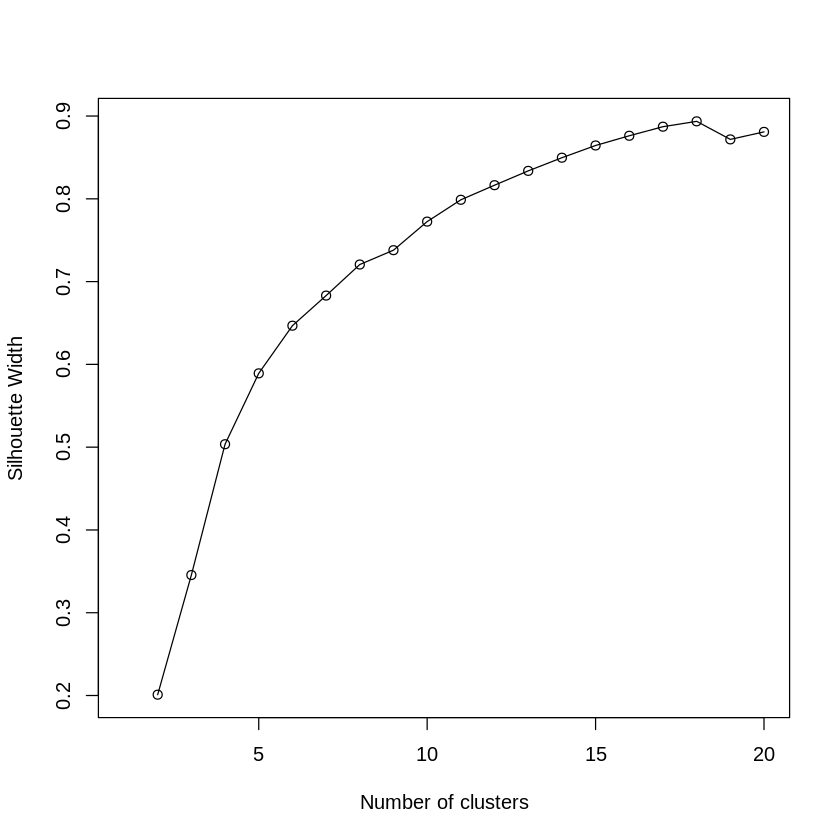

In [86]:
plot(1:20, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:20, sil_width)

We notice 18 clusters yield the highest value

### Interpreting the Clusters

In [89]:
pam_fit <- pam(gower_dist, diss = TRUE, k = 18)

pam_results <- data %>%
  dplyr::select(-Title) %>%
  mutate(cluster = pam_fit$clustering) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))

pam_results$the_summary

[[1]]
      Country      Followers           Engagement         cluster 
 India    :143   Min.   :  4000000   Min.   :  85900   Min.   :1  
 Algeria  :  0   1st Qu.: 11500000   1st Qu.: 253500   1st Qu.:1  
 Argentina:  0   Median : 18800000   Median : 409800   Median :1  
 Brazil   :  0   Mean   : 34517483   Mean   : 663955   Mean   :1  
 Chile    :  0   3rd Qu.: 34050000   3rd Qu.: 774650   3rd Qu.:1  
 China    :  0   Max.   :469600000   Max.   :7800000   Max.   :1  
 (Other)  :  0                                                    

[[2]]
          Country      Followers           Engagement          cluster 
 United States:283   Min.   :  3200000   Min.   :   38300   Min.   :2  
 Algeria      :  0   1st Qu.:  9450000   1st Qu.:  183900   1st Qu.:2  
 Argentina    :  0   Median : 16800000   Median :  304400   Median :2  
 Brazil       :  0   Mean   : 32212721   Mean   :  666363   Mean   :2  
 Chile        :  0   3rd Qu.: 28650000   3rd Qu.:  613150   3rd Qu.:2  
 China        :  0 

On Interpretation we can notice that data has been clustered majorly on the accounts with almost same country of Audience. 

##### Visualisating the Cluster

In [91]:
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [92]:
library(Rtsne)

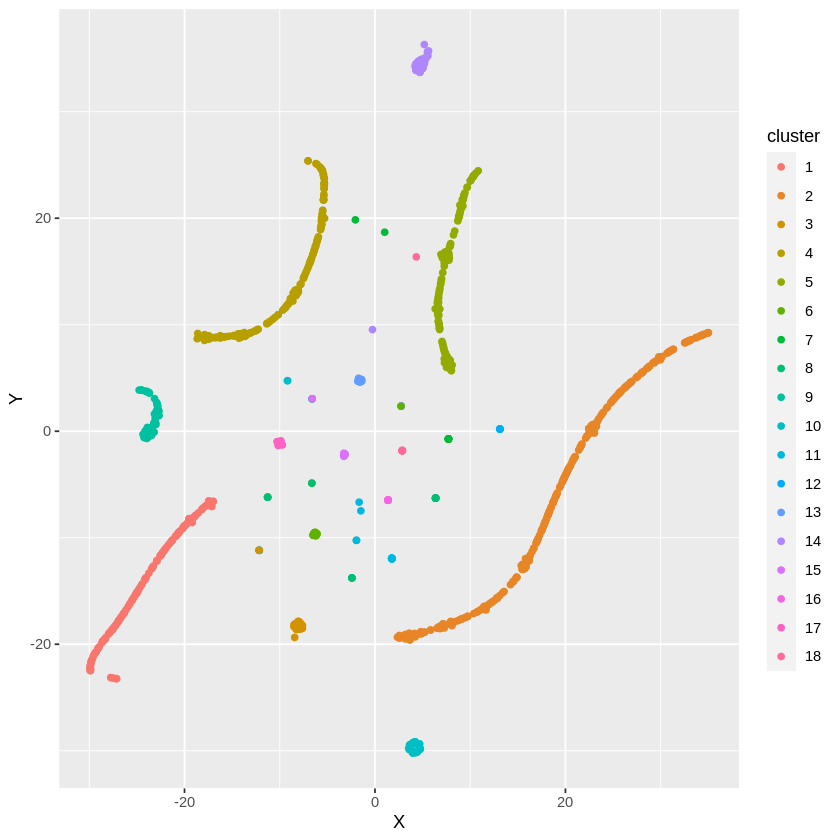

In [93]:
tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)

tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering),
         name = data$Title)

ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))